<a href="https://colab.research.google.com/github/FThameema/urban-octo-fortnight/blob/main/1D_Burgers_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['animation.html'] = 'jshtml'

print(" Starting Day 1: 1D Burger's Equation")

 Starting Day 1: 1D Burger's Equation


In [8]:

# Simulation parameters
L = 2.0         # Domain length
Nx = 101        # Number of grid points
dx = L / (Nx-1) # Grid spacing
dt = 0.001      # Time step
nu = 0.01       # Viscosity
T_total = 2.0   # Total time
Nt = int(T_total / dt)  # Time steps

# Create grid and initial condition
x = np.linspace(0, L, Nx)
u = np.sin(2 * np.pi * x / L)  # Sine wave

print(f"Grid: {Nx} points")
print(f"Time steps: {Nt}")
print(f"CFL condition: {dt/dx:.3f} (should be < 1 for stability)")

Grid: 101 points
Time steps: 2000
CFL condition: 0.050 (should be < 1 for stability)


In [9]:

def solve_burgers(u, Nt, dt, dx, nu):
    """Solve 1D Burger's equation"""
    u_history = [u.copy()]

    for n in range(Nt):
        u_new = u.copy()

        # Update interior points
        for i in range(1, Nx-1):
            # Upwind scheme for convection
            if u[i] >= 0:
                conv = u[i] * (u[i] - u[i-1]) / dx
            else:
                conv = u[i] * (u[i+1] - u[i]) / dx

            # Diffusion term
            diff = (u[i+1] - 2*u[i] + u[i-1]) / (dx**2)

            # Combine all terms
            u_new[i] = u[i] - dt * conv + dt * nu * diff

        # Periodic boundary conditions
        u_new[0] = u_new[-2]
        u_new[-1] = u_new[1]

        u = u_new.copy()

        # Store every 100 frames
        if n % 100 == 0:
            u_history.append(u.copy())
            if n % 1000 == 0:
                print(f"Progress: {n/Nt*100:.1f}%")

    return u_history

print("Solving Burger's equation...")
u_history = solve_burgers(u, Nt, dt, dx, nu)
print(" Simulation complete!")

Solving Burger's equation...
Progress: 0.0%
Progress: 50.0%
 Simulation complete!


In [10]:

fig, ax = plt.subplots()
line, = ax.plot(x, u_history[0], 'b-', linewidth=2)
ax.set_xlim(0, L)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('Position x')
ax.set_ylabel('Velocity u')
ax.set_title('1D Burger\'s Equation - Shock Formation')
ax.grid(True, alpha=0.3)

def animate(frame):
    line.set_ydata(u_history[frame])
    ax.set_title(f'1D Burger\'s Equation - Time: {frame*100*dt:.2f}s')
    return line,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(u_history), interval=100, blit=False)
plt.close()

# Display animation
print(" Displaying animation...")
anim

 Displaying animation...


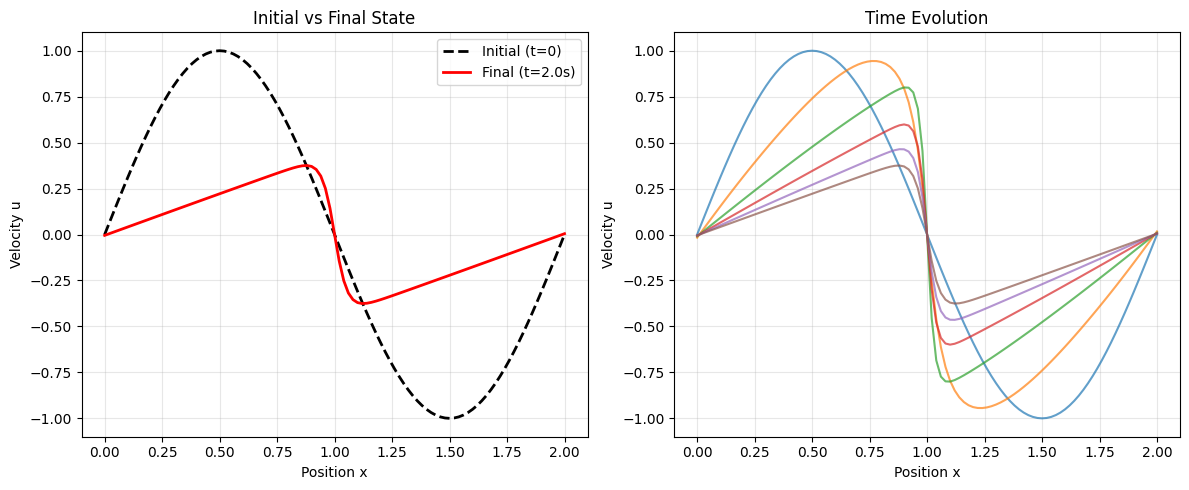

 Analysis complete!


In [11]:
# Final Results Analysis
plt.figure(figsize=(12, 5))

# Plot 1: Initial vs Final
plt.subplot(1, 2, 1)
plt.plot(x, u_history[0], 'k--', label='Initial (t=0)', linewidth=2)
plt.plot(x, u_history[-1], 'r-', label=f'Final (t={T_total}s)', linewidth=2)
plt.xlabel('Position x')
plt.ylabel('Velocity u')
plt.title('Initial vs Final State')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Evolution over time
plt.subplot(1, 2, 2)
for i in range(0, len(u_history), 4):  # Plot every 4th frame
    plt.plot(x, u_history[i], alpha=0.7, label=f't={i*100*dt:.1f}s')
plt.xlabel('Position x')
plt.ylabel('Velocity u')
plt.title('Time Evolution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Analysis complete!")

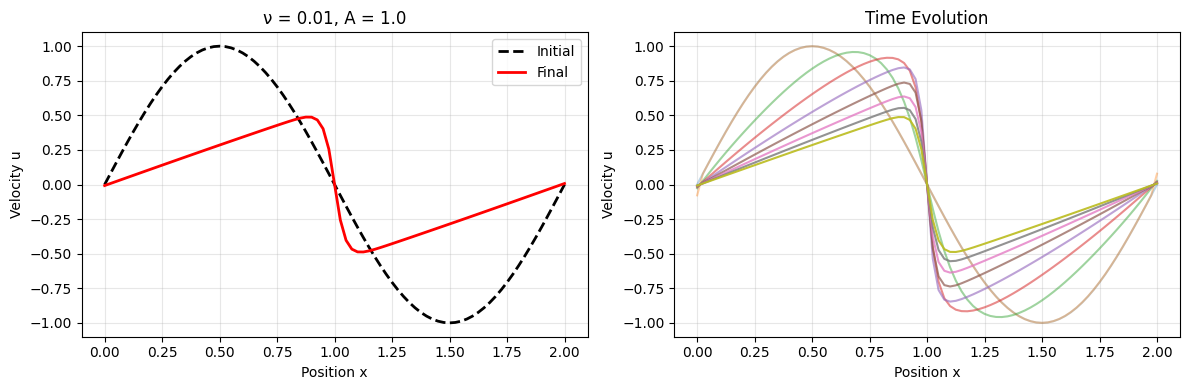

 Simulation complete: ν=0.01, Amplitude=1.0
 Shock strength: 0.01


In [12]:
# Interactive Parameter Explorer
import ipywidgets as widgets
from IPython.display import display

def interactive_burgers(nu=0.01, initial_amplitude=1.0, simulation_time=1.5):
    """Interactive Burger's equation with sliders"""
    # Parameters
    L = 2.0
    Nx = 81
    dx = L / (Nx-1)
    dt = 0.001
    T_total = simulation_time
    Nt = int(T_total / dt)

    # Initial condition
    x = np.linspace(0, L, Nx)
    u = initial_amplitude * np.sin(2 * np.pi * x / L)

    # Solve
    u_history = [u.copy()]
    u_current = u.copy()

    for n in range(Nt):
        u_new = u_current.copy()

        for i in range(1, Nx-1):
            # Upwind scheme
            if u_current[i] >= 0:
                conv = u_current[i] * (u_current[i] - u_current[i-1]) / dx
            else:
                conv = u_current[i] * (u_current[i+1] - u_current[i]) / dx

            # Diffusion
            diff = (u_current[i+1] - 2*u_current[i] + u_current[i-1]) / (dx**2)

            # Update
            u_new[i] = u_current[i] - dt * conv + dt * nu * diff

        # Boundary conditions
        u_new[0] = u_new[-2]
        u_new[-1] = u_new[1]

        u_current = u_new

        if n % 200 == 0:
            u_history.append(u_new.copy())

    # Plot
    plt.figure(figsize=(12, 4))

    # Plot initial vs final
    plt.subplot(1, 2, 1)
    plt.plot(x, u_history[0], 'k--', label='Initial', linewidth=2)
    plt.plot(x, u_history[-1], 'r-', label='Final', linewidth=2)
    plt.xlabel('Position x')
    plt.ylabel('Velocity u')
    plt.title(f'ν = {nu}, A = {initial_amplitude}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot evolution
    plt.subplot(1, 2, 2)
    for i in range(0, len(u_history), max(1, len(u_history)//5)):
        alpha = 0.3 + 0.7 * (i / len(u_history))
        plt.plot(x, u_history[i], alpha=alpha, linewidth=1.5)
    plt.xlabel('Position x')
    plt.ylabel('Velocity u')
    plt.title('Time Evolution')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f" Simulation complete: ν={nu}, Amplitude={initial_amplitude}")
    print(f" Shock strength: {np.max(np.gradient(u_history[-1])):.2f}")


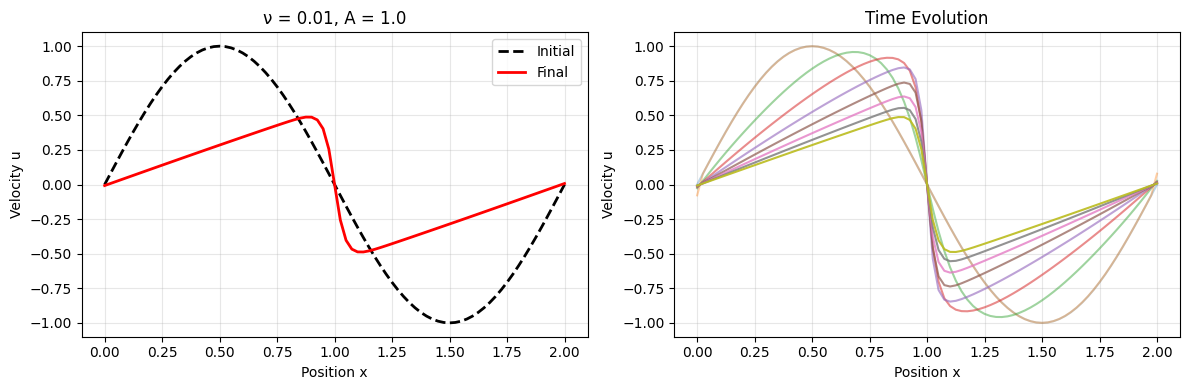

 Simulation complete: ν=0.01, Amplitude=1.0
 Shock strength: 0.01


In [13]:
# Create interactive widgets
# print("🎮 INTERACTIVE BURGER'S EQUATION EXPLORER")
# print("Drag the sliders and watch the physics change in real-time!")

# widgets.interact(interactive_burgers,
#                  nu=widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Viscosity ν:'),
#                  initial_amplitude=widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Amplitude:'),
#                  simulation_time=widgets.FloatSlider(value=1.5, min=0.5, max=3.0, step=0.1, description='Time:'));

# Define variables for the function
viscosity = 0.01
amplitude = 1.0
sim_time = 1.5

# Call the function with variables
interactive_burgers(nu=viscosity, initial_amplitude=amplitude, simulation_time=sim_time)